# Predict Bike Sharing Demand with AutoGluon

## Project: Predict Bike Sharing Demand with AutoGluon
This notebook is a template with each step that you need to complete for the project.

Please fill in your code where there are explicit `?` markers in the notebook. You are welcome to add more cells and code as you see fit.

Once you have completed all the code implementations, please export your notebook as a HTML file so the reviews can view your code. Make sure you have all outputs correctly outputted.

`File-> Export Notebook As... -> Export Notebook as HTML`

There is a writeup to complete as well after all code implememtation is done. Please answer all questions and attach the necessary tables and charts. You can complete the writeup in either markdown or PDF.

Completing the code template and writeup template will cover all of the rubric points for this project.

The rubric contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this notebook and also discuss the results in the writeup file.

## Step 1: Create an account with Kaggle

### Create Kaggle Account and download API key
Below is example of steps to get the API username and key. Each student will have their own username and key.

1. Open account settings.
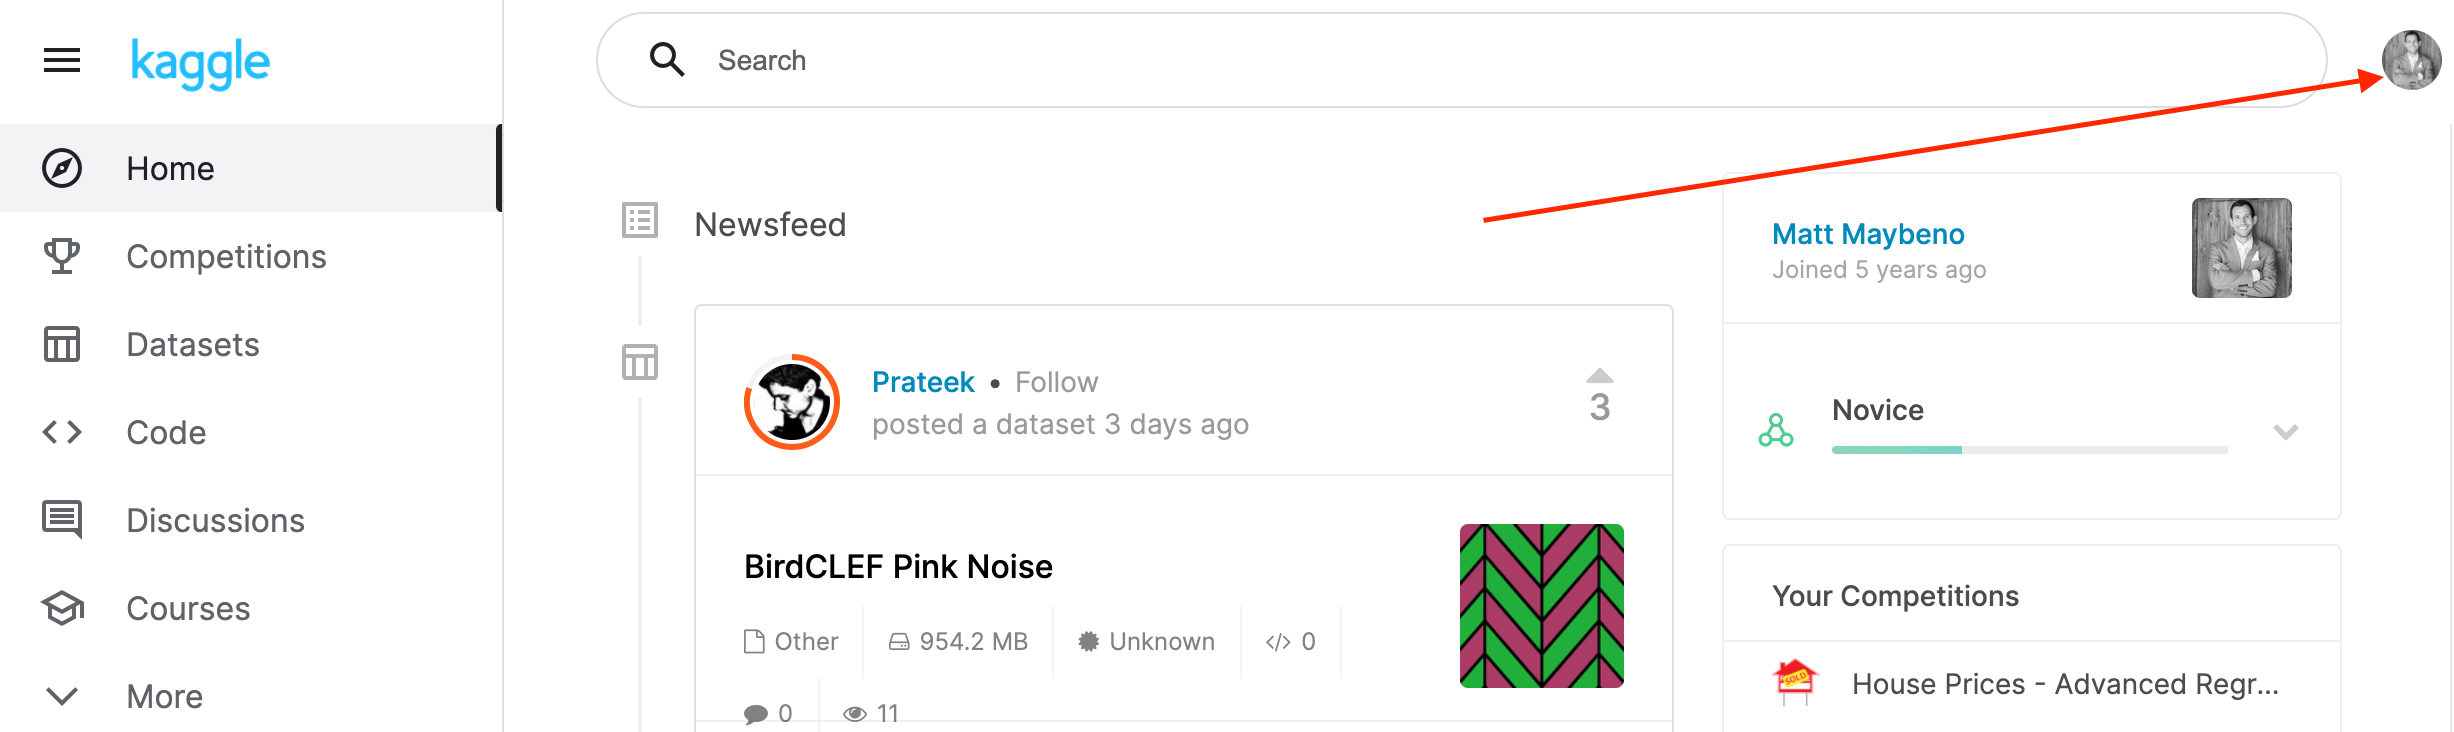
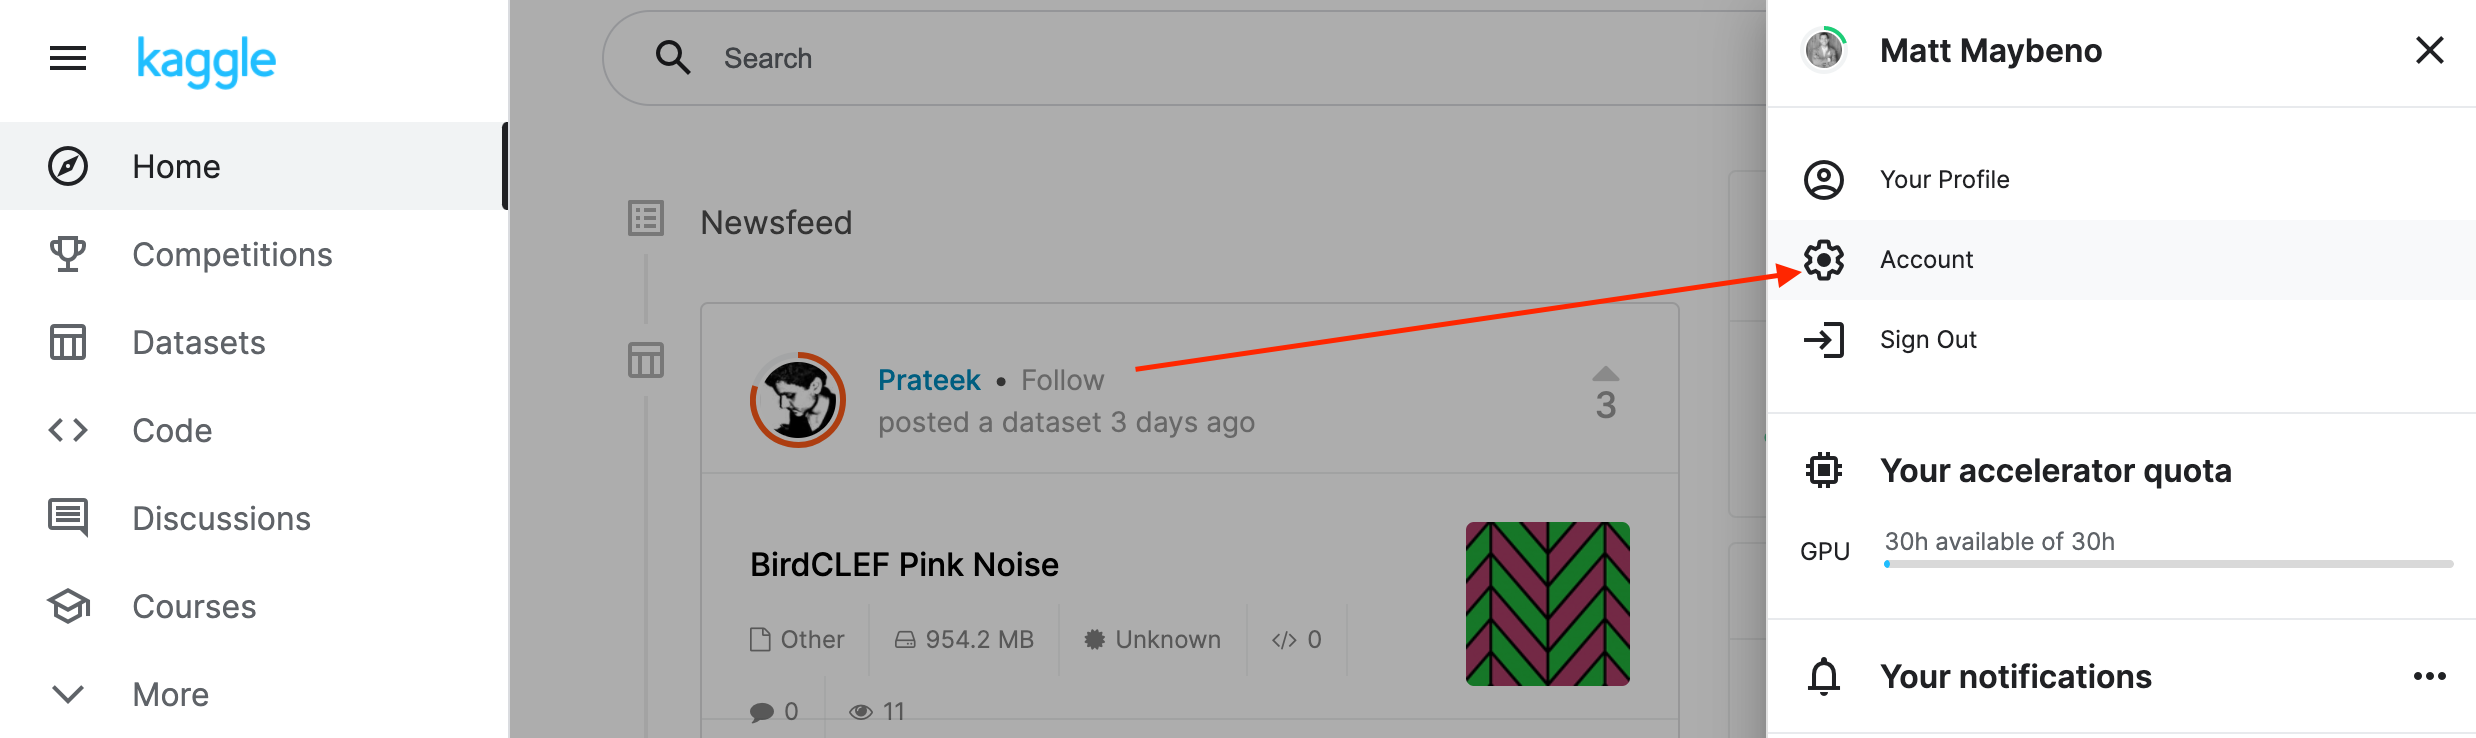
2. Scroll down to API and click Create New API Token.
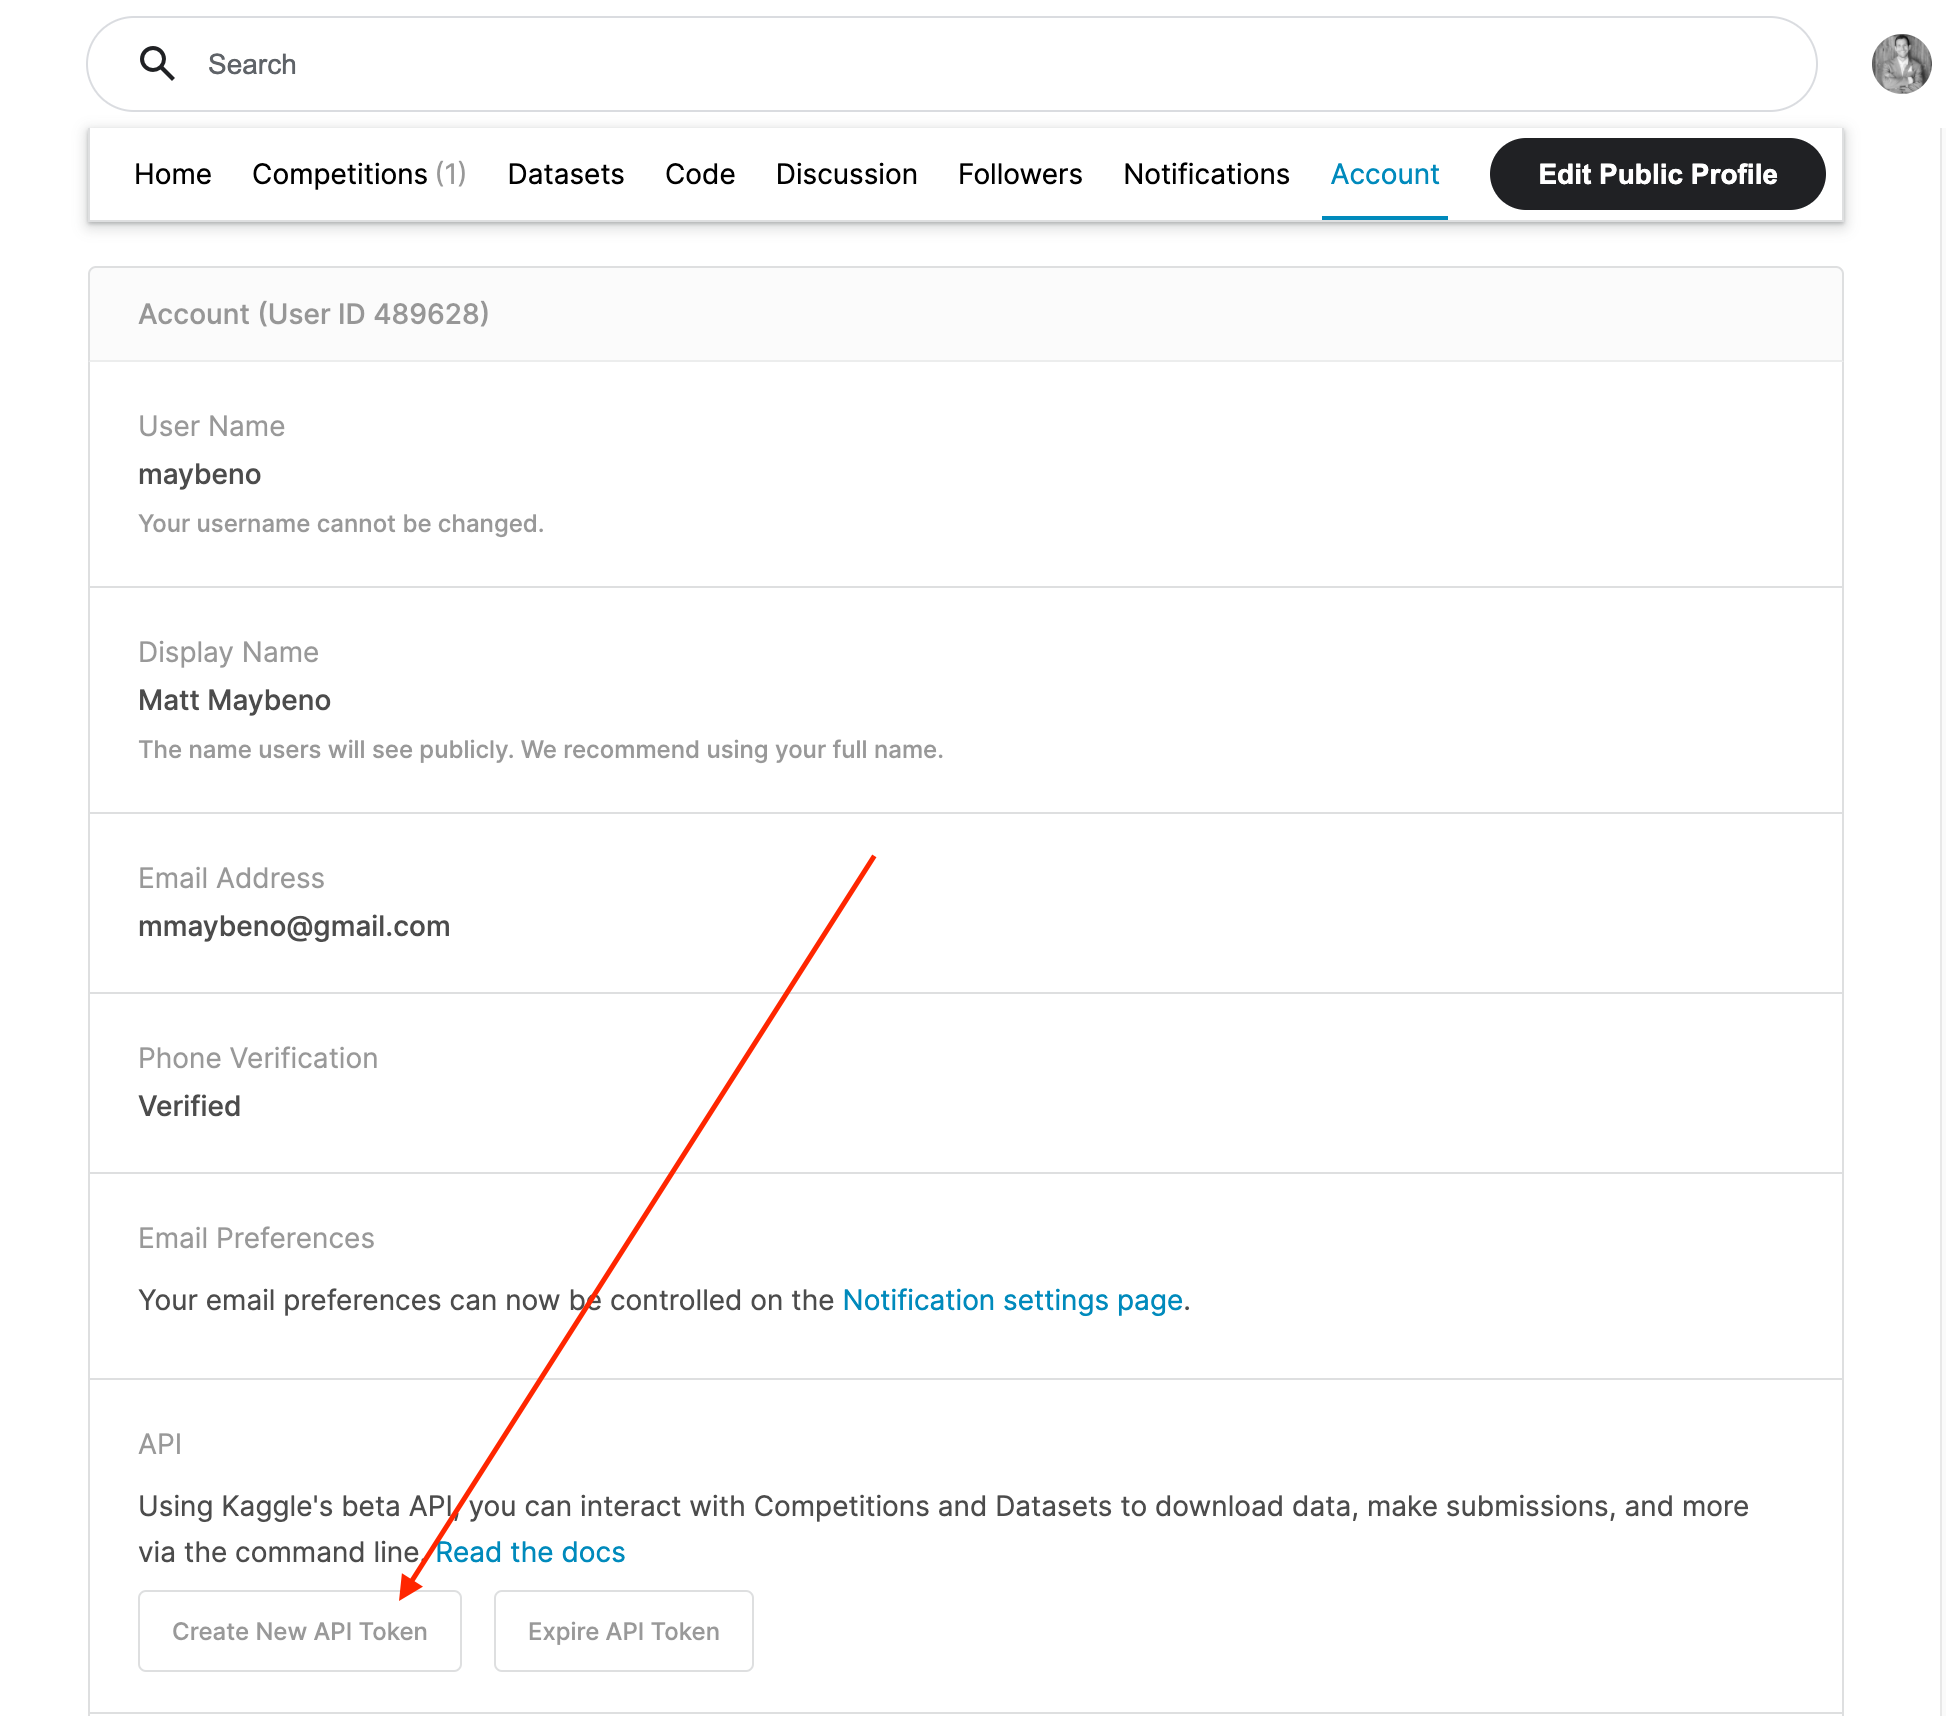
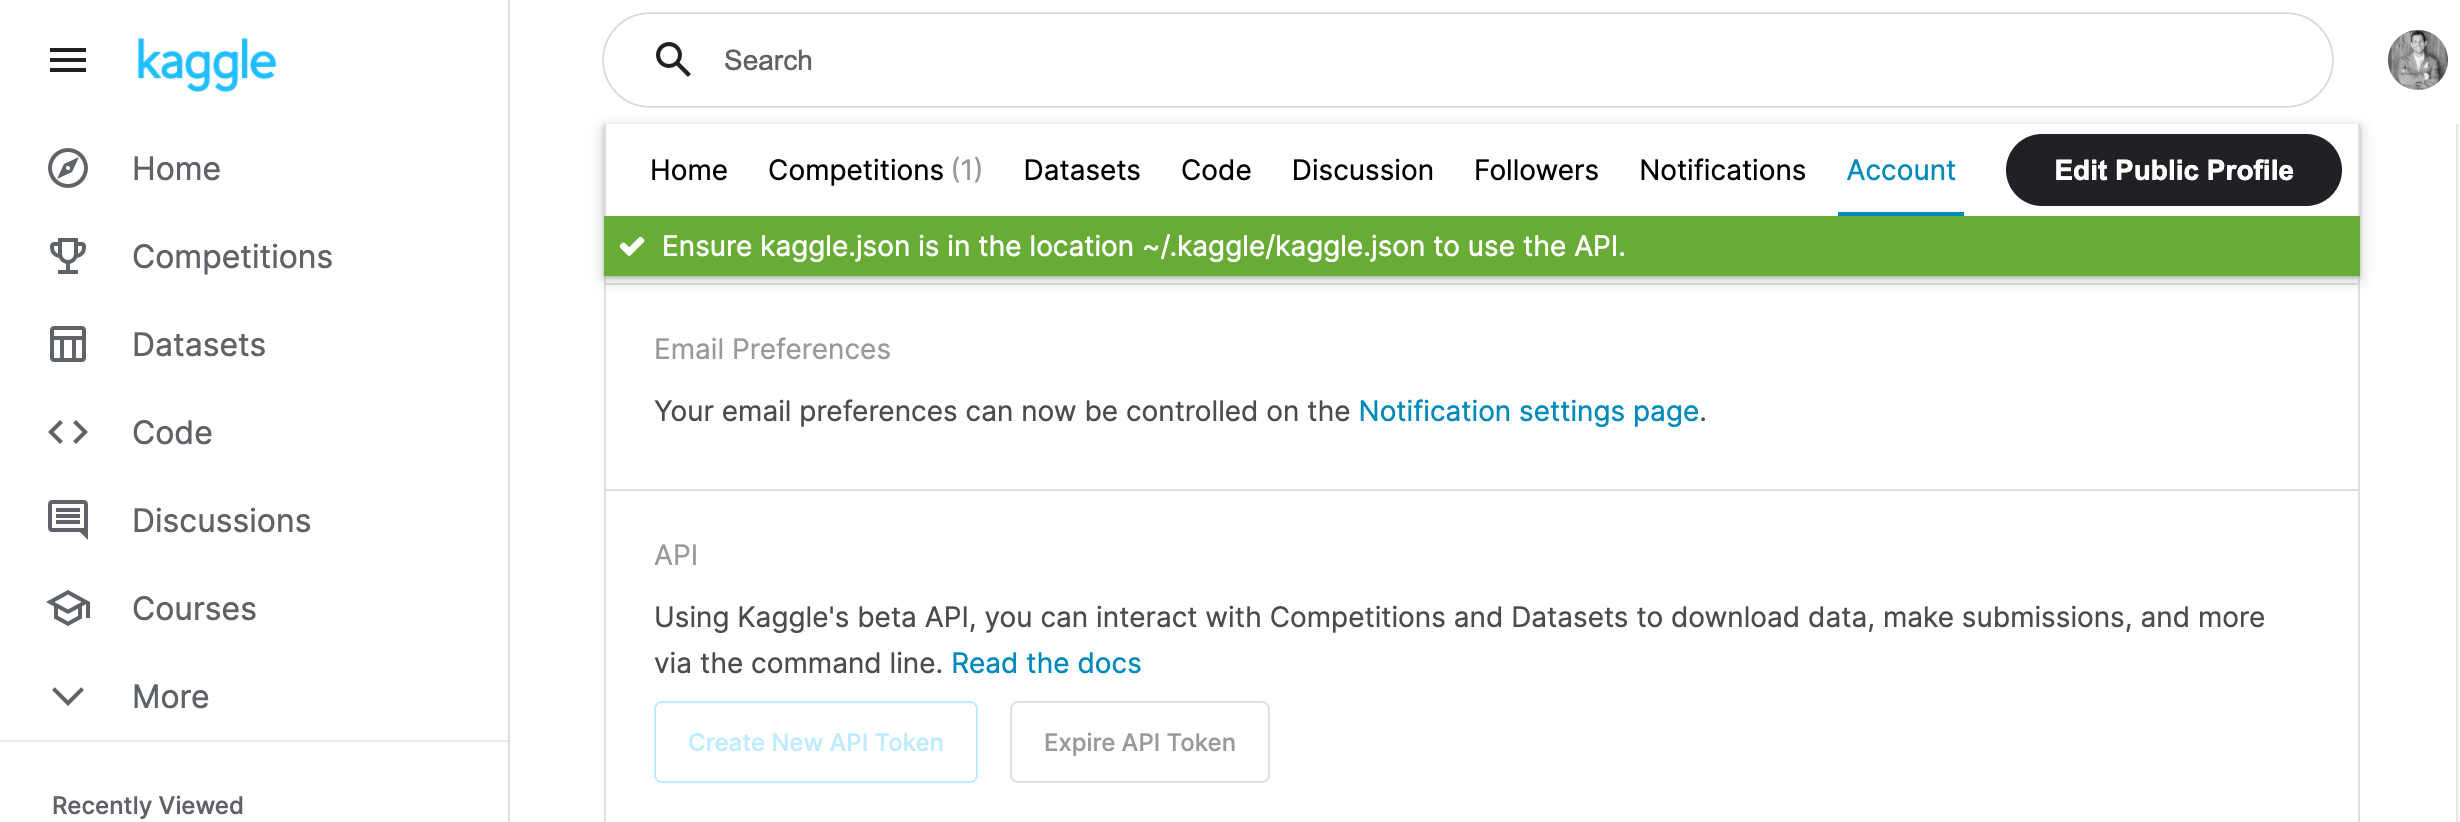
3. Open up `kaggle.json` and use the username and key.
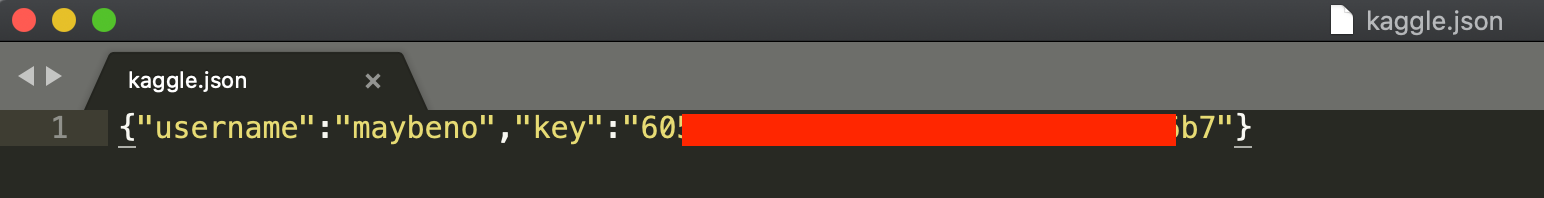

## Step 2: Download the Kaggle dataset using the kaggle python library

### Open up Sagemaker Studio and use starter template

1. Notebook should be using a `ml.t3.medium` instance (2 vCPU + 4 GiB)
2. Notebook should be using kernal: `Python 3 (MXNet 1.8 Python 3.7 CPU Optimized)`

### Install packages

In [3]:
# !pip install -U pip
# !pip install -U setuptools wheel
# !pip install -U "mxnet<2.0.0" bokeh==2.0.1
# !pip install autogluon --no-cache-dir
# !pip install kaggle
# Without --no-cache-dir, smaller aws instances may have trouble installing

  Using cached pip-22.3.1-py3-none-any.whl (2.1 MB)
  Attempting uninstall: pip
    Found existing installation: pip 21.3.1
    Uninstalling pip-21.3.1:
      Successfully uninstalled pip-21.3.1
  Using cached setuptools-65.6.3-py3-none-any.whl (1.2 MB)
  Using cached wheel-0.38.4-py3-none-any.whl (36 kB)
  Attempting uninstall: setuptools
    Found existing installation: setuptools 59.4.0
    Uninstalling setuptools-59.4.0:
      Successfully uninstalled setuptools-59.4.0
  Using cached mxnet-1.9.1-py3-none-manylinux2014_x86_64.whl (49.1 MB)
  Using cached bokeh-2.0.1-py3-none-any.whl
  Attempting uninstall: bokeh
    Found existing installation: bokeh 2.4.2
    Uninstalling bokeh-2.4.2:
      Successfully uninstalled bokeh-2.4.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 286.0/286.0 kB 122.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.6/226.6 kB 234.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.0/103.0 kB 199.2 MB/s eta 0:00:00
     ━━━━━━━━━━━

### Setup Kaggle API Key

In [11]:
# create the .kaggle directory and an empty kaggle.json file

# !mkdir -p /root/.kaggle
# !touch /root/.kaggle/kaggle.json
# !chmod 600 /root/.kaggle/kaggle.json

!mkdir -p /Users/narmina/.kaggle
!touch /Users/narmina/.kaggle/kaggle.json
!chmod 600 /Users/narmina/.kaggle/kaggle.json

In [3]:
# Fill in your user name and key from creating the kaggle account and API token file
import json
kaggle_username = "nayayyc"
kaggle_key = "fa9bd198433174b4a6edb2f7620a6e62"

# Save API token the kaggle.json file
with open("/Users/narmina/.kaggle/kaggle.json", "w") as f:
    f.write(json.dumps({"username": kaggle_username, "key": kaggle_key}))

### Download and explore dataset

### Go to the bike sharing demand competition and agree to the terms
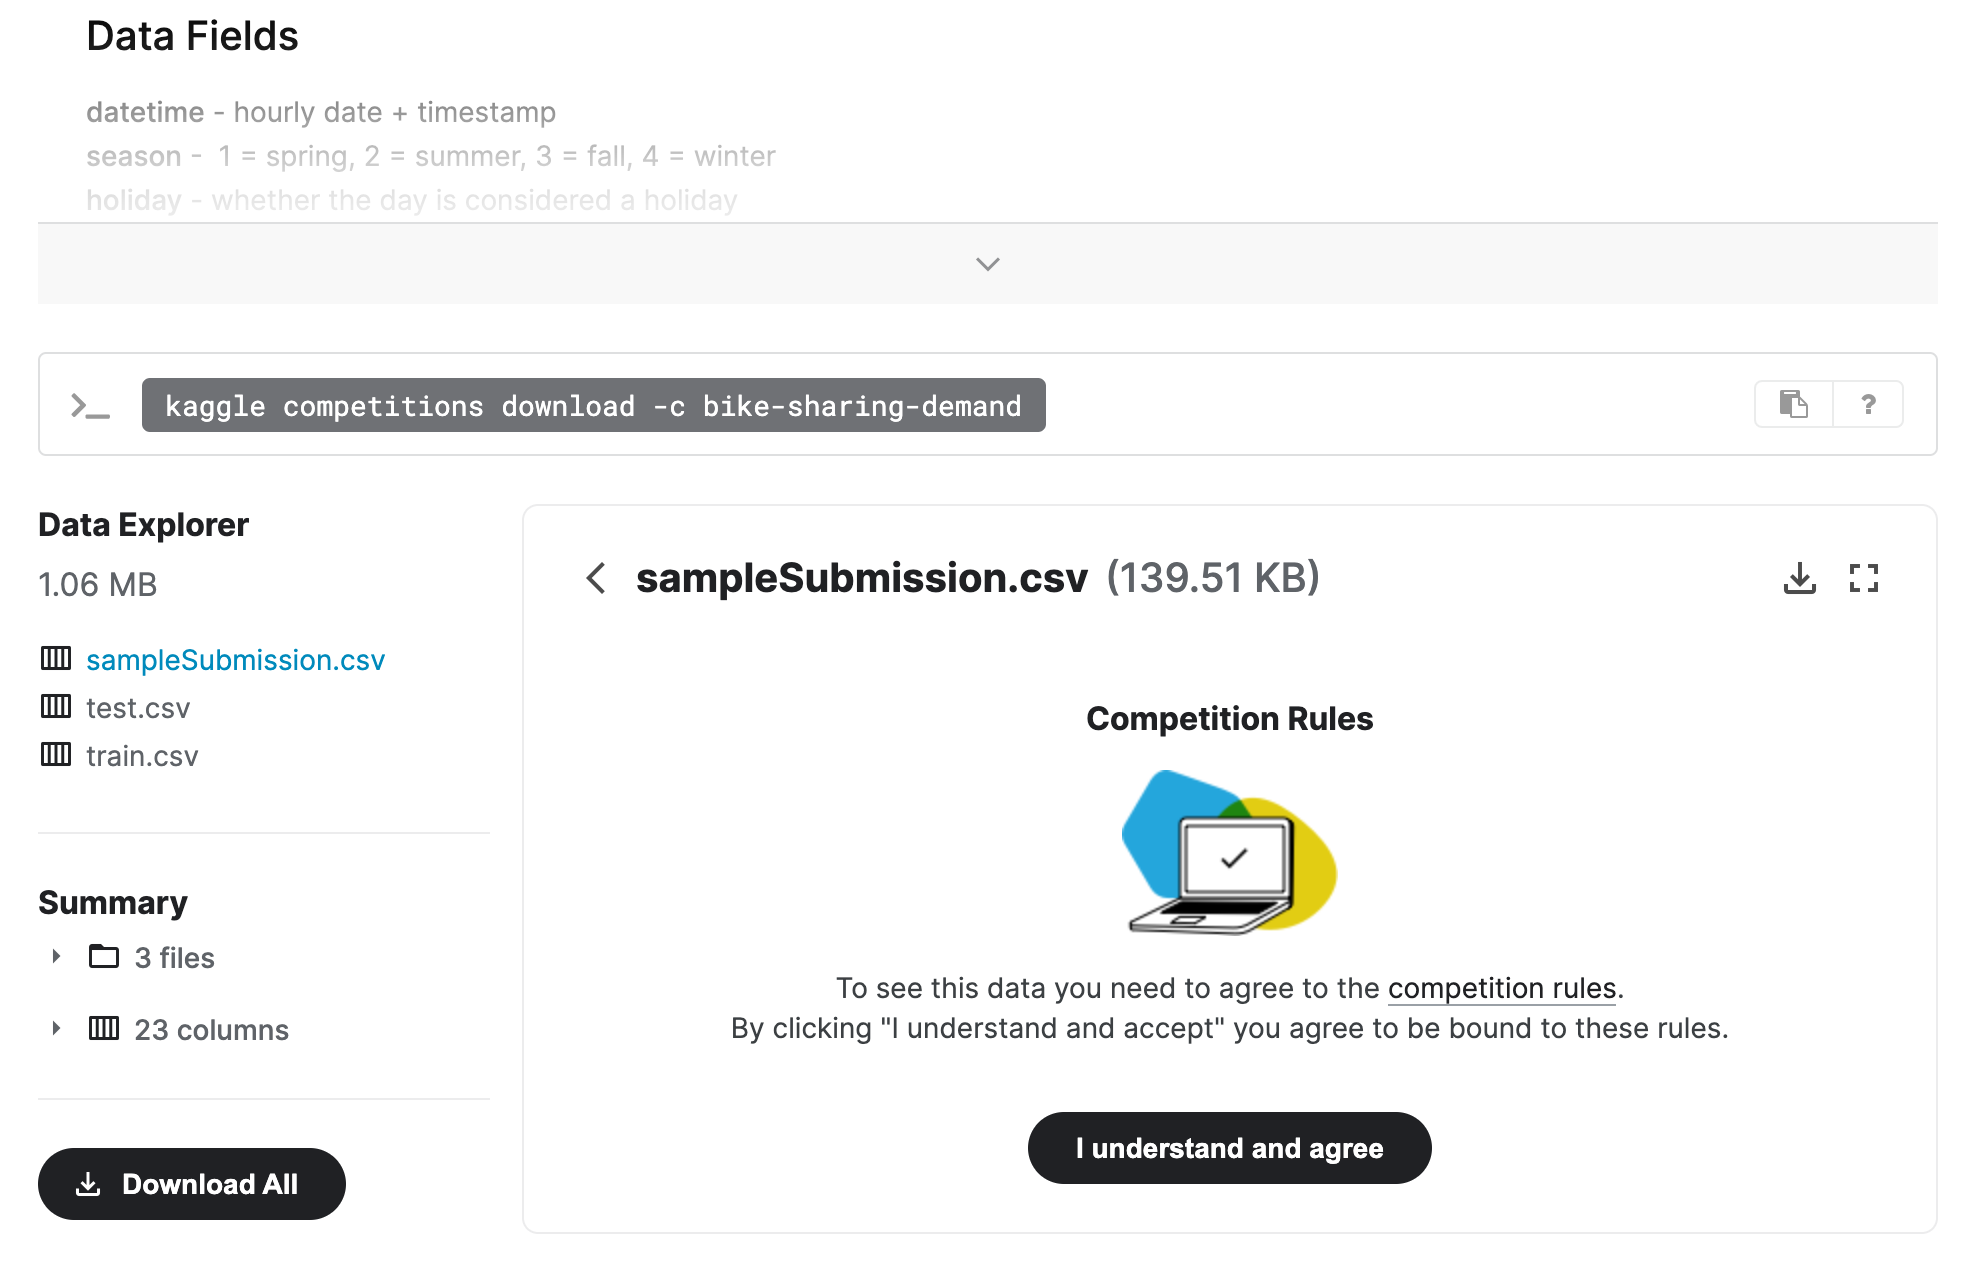

In [12]:
# Download the dataset, it will be in a .zip file so you'll need to unzip it as well.
!kaggle competitions download -c bike-sharing-demand
# If you already downloaded it you can use the -o command to overwrite the file
!unzip -o bike-sharing-demand.zip

bike-sharing-demand.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  bike-sharing-demand.zip
  inflating: sampleSubmission.csv    
  inflating: test.csv                
  inflating: train.csv               


In [11]:
import pandas as pd
from autogluon.tabular import TabularPredictor

In [12]:
# Create the train dataset in pandas by reading the csv
# Set the parsing of the datetime column so you can use some of the `dt` features in pandas later
train = pd.read_csv("train.csv")
train.head()

datetime  season  holiday  workingday  weather  temp   atemp  \
0  2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1  2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2  2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3  2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4  2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40  
2        80        0.0       5          27     32  
3        75        0.0       3          10     13  
4        75        0.0       0           1      1

In [13]:
train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [14]:
# Simple output of the train dataset to view some of the min/max/varition of the dataset features.
train.describe()

season       holiday    workingday       weather         temp  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.00000   
mean       2.506614      0.028569      0.680875      1.418427     20.23086   
std        1.116174      0.166599      0.466159      0.633839      7.79159   
min        1.000000      0.000000      0.000000      1.000000      0.82000   
25%        2.000000      0.000000      0.000000      1.000000     13.94000   
50%        3.000000      0.000000      1.000000      1.000000     20.50000   
75%        4.000000      0.000000      1.000000      2.000000     26.24000   
max        4.000000      1.000000      1.000000      4.000000     41.00000   

              atemp      humidity     windspeed        casual    registered  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.000000   
mean      23.655084     61.886460     12.799395     36.021955    155.552177   
std        8.474601     19.245033      8.164537     49.960477    151.039033   
min        0.760000      0.000000      0.000000      0.000000      0.000000   
25%       16.665000     47.000000      7.001500      4.000000     36.000000   
50%       24.240000     62.000000     12.998000     17.000000    118.000000   
75%       31.060000     77.000000     16.997900     49.000000    222.000000   
max       45.455000    100.000000     56.996900    367.000000    886.000000   

              count  
count  10886.000000  
mean     191.574132  
std      181.144454  
min        1.000000  
25%       42.000000  
50%      145.000000  
75%      284.000000  
max      977.000000

In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [16]:
# Create the test pandas dataframe in pandas by reading the csv, remember to parse the datetime!
test = pd.read_csv("test.csv")
test.head()

datetime  season  holiday  workingday  weather   temp   atemp  \
0  2011-01-20 00:00:00       1        0           1        1  10.66  11.365   
1  2011-01-20 01:00:00       1        0           1        1  10.66  13.635   
2  2011-01-20 02:00:00       1        0           1        1  10.66  13.635   
3  2011-01-20 03:00:00       1        0           1        1  10.66  12.880   
4  2011-01-20 04:00:00       1        0           1        1  10.66  12.880   

   humidity  windspeed  
0        56    26.0027  
1        56     0.0000  
2        56     0.0000  
3        56    11.0014  
4        56    11.0014

In [17]:
test.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed'],
      dtype='object')

In [18]:
test.describe()

season      holiday   workingday      weather         temp  \
count  6493.000000  6493.000000  6493.000000  6493.000000  6493.000000   
mean      2.493300     0.029108     0.685815     1.436778    20.620607   
std       1.091258     0.168123     0.464226     0.648390     8.059583   
min       1.000000     0.000000     0.000000     1.000000     0.820000   
25%       2.000000     0.000000     0.000000     1.000000    13.940000   
50%       3.000000     0.000000     1.000000     1.000000    21.320000   
75%       3.000000     0.000000     1.000000     2.000000    27.060000   
max       4.000000     1.000000     1.000000     4.000000    40.180000   

             atemp     humidity    windspeed  
count  6493.000000  6493.000000  6493.000000  
mean     24.012865    64.125212    12.631157  
std       8.782741    19.293391     8.250151  
min       0.000000    16.000000     0.000000  
25%      16.665000    49.000000     7.001500  
50%      25.000000    65.000000    11.001400  
75%      31.060000    81.000000    16.997900  
max      50.000000   100.000000    55.998600

In [19]:
# Same thing as train and test dataset
submission = pd.read_csv("sampleSubmission.csv")
submission.head()

datetime  count
0  2011-01-20 00:00:00      0
1  2011-01-20 01:00:00      0
2  2011-01-20 02:00:00      0
3  2011-01-20 03:00:00      0
4  2011-01-20 04:00:00      0

In [20]:
submission.describe()

count
count  6493.0
mean      0.0
std       0.0
min       0.0
25%       0.0
50%       0.0
75%       0.0
max       0.0

## Step 3: Train a model using AutoGluon’s Tabular Prediction

Requirements:
* We are prediting `count`, so it is the label we are setting.
* Ignore `casual` and `registered` columns as they are also not present in the test dataset. 
* Use the `root_mean_squared_error` as the metric to use for evaluation.
* Set a time limit of 10 minutes (600 seconds).
* Use the preset `best_quality` to focus on creating the best model.

In [21]:
# Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20

In [22]:
## I will be dropping these two columns as they are not present in test dataset instead of ignoring columns. 
train.drop(columns=['casual','registered'], inplace = True )

In [30]:
predictor = TabularPredictor(
    label='count', 
    eval_metric = 'root_mean_squared_error',
).fit(
    train_data = train,
    # ignored_columns = ['casual','registered'],
    time_limit = 600, 
    presets='best_quality'
)

No path specified. Models will be saved in: "AutogluonModels/ag-20221223_162437/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20221223_162437/"
AutoGluon Version:  0.6.1
Python Version:     3.7.10
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Wed Oct 26 20:36:53 UTC 2022
Train Data Rows:    10886
Train Data Columns: 9
Label Column: count
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (977, 1, 191.57413, 181.14445)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Fea

### Review AutoGluon's training run with ranking of models that did the best.

In [ ]:
predictor.fit_summary()

NameError: name 'predictor' is not defined

<AxesSubplot:xlabel='model'>

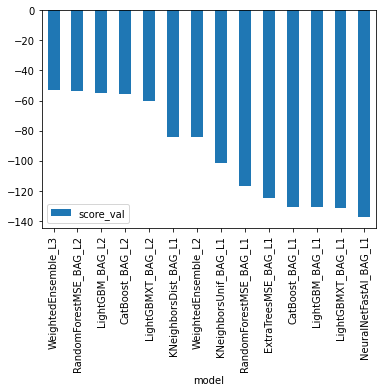

In [38]:
predictor.leaderboard(silent=True).plot(kind="bar", x="model", y="score_val")

In [37]:
predictor.evaluate(train)

Evaluation: root_mean_squared_error on test data: -79.26299509967701
	Note: Scores are always higher_is_better. This metric score can be multiplied by -1 to get the metric value.
Evaluations on test data:
{
    "root_mean_squared_error": -79.26299509967701,
    "mean_squared_error": -6282.622392171422,
    "mean_absolute_error": -53.427997070776506,
    "r2": 0.8085167582911802,
    "pearsonr": 0.9373022933955306,
    "median_absolute_error": -30.41851806640625
}


{'root_mean_squared_error': -79.26299509967701,
 'mean_squared_error': -6282.622392171422,
 'mean_absolute_error': -53.427997070776506,
 'r2': 0.8085167582911802,
 'pearsonr': 0.9373022933955306,
 'median_absolute_error': -30.41851806640625}

### Create predictions from test dataset

In [43]:
predictions = predictor.predict(test)
predictions.head()

0    24.031446
1    42.612297
2    45.983887
3    49.316662
4    52.370277
Name: count, dtype: float32

#### NOTE: Kaggle will reject the submission if we don't set everything to be > 0.

In [44]:
# Describe the `predictions` series to see if there are any negative values
predictions.describe()

count    6493.000000
mean      100.985329
std        90.027641
min         3.167315
25%        20.553885
50%        64.802277
75%       167.432526
max       365.379211
Name: count, dtype: float64

In [45]:
# How many negative values do we have?
(predictions<0).sum()

0

In [47]:
# Set them to zero - nothing to worry about

### Set predictions to submission dataframe, save, and submit

In [49]:
submission["count"] = predictions
submission.to_csv("submission.csv", index=False)

In [51]:
!kaggle competitions submit -c bike-sharing-demand -f submission.csv -m "first raw submission"

100%|█████████████████████████████████████████| 188k/188k [00:00<00:00, 363kB/s]
Successfully submitted to Bike Sharing Demand

#### View submission via the command line or in the web browser under the competition's page - `My Submissions`

In [52]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName        date                 description           status    publicScore  privateScore  
--------------  -------------------  --------------------  --------  -----------  ------------  
submission.csv  2022-12-23 16:41:50  first raw submission  complete  1.79033      1.79033       


#### Initial score of 1.79033 

## Step 4: Exploratory Data Analysis and Creating an additional feature
* Any additional feature will do, but a great suggestion would be to separate out the datetime into hour, day, or month parts.

### Distribution analysis

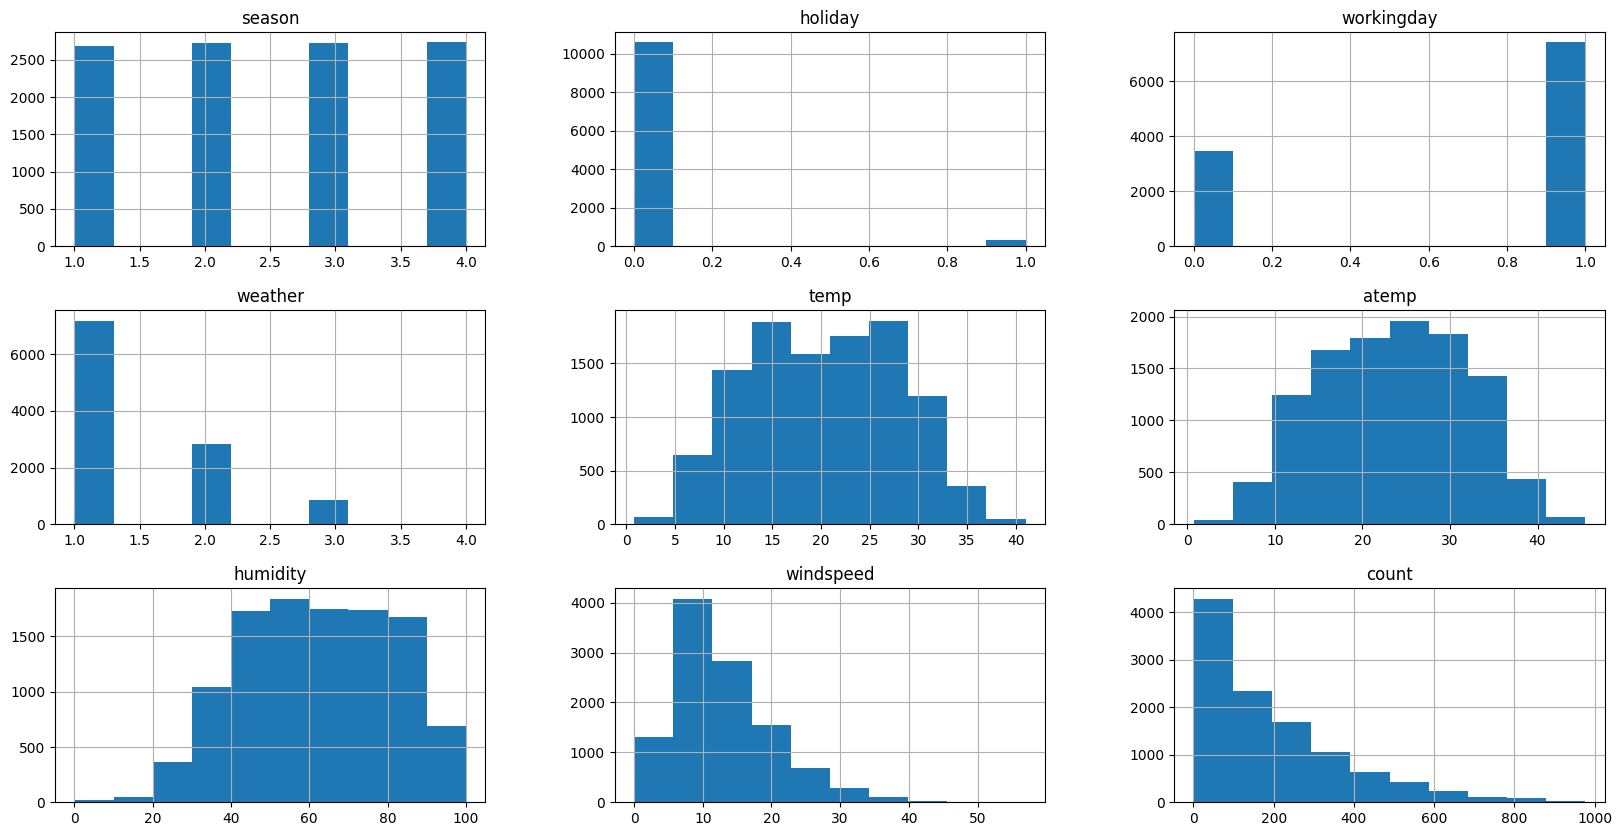

In [17]:
# Create a histogram of all features to show the distribution of each one relative to the data. This is part of the exploratory data analysis
import matplotlib.pyplot as plt

train.hist(figsize = (20,10))
plt.show()

### Correlation analysis

<AxesSubplot:>

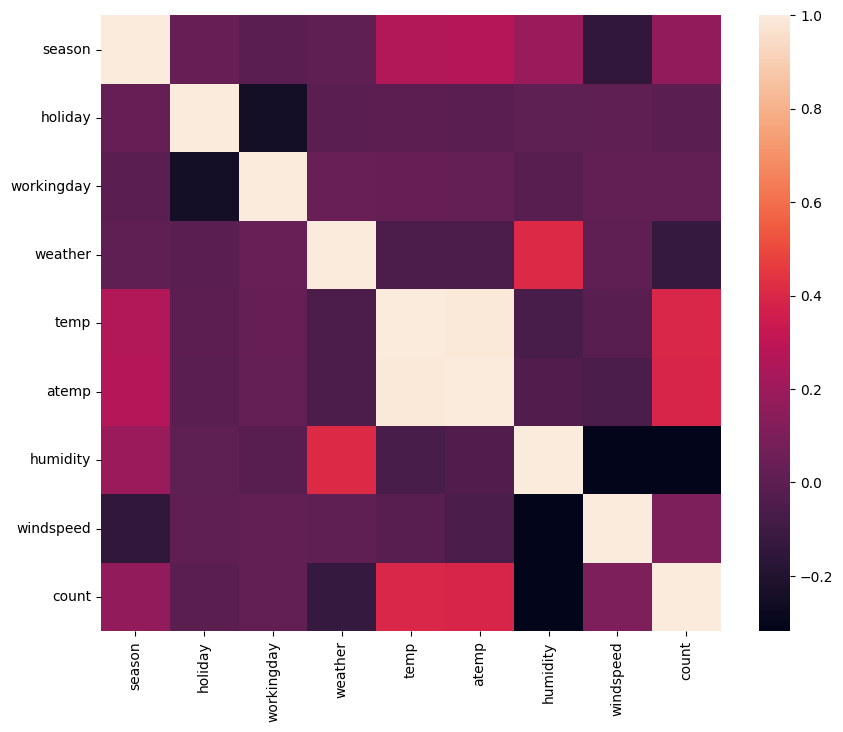

In [18]:
## Let's visualize correlations using heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))

sns.heatmap(train.corr())

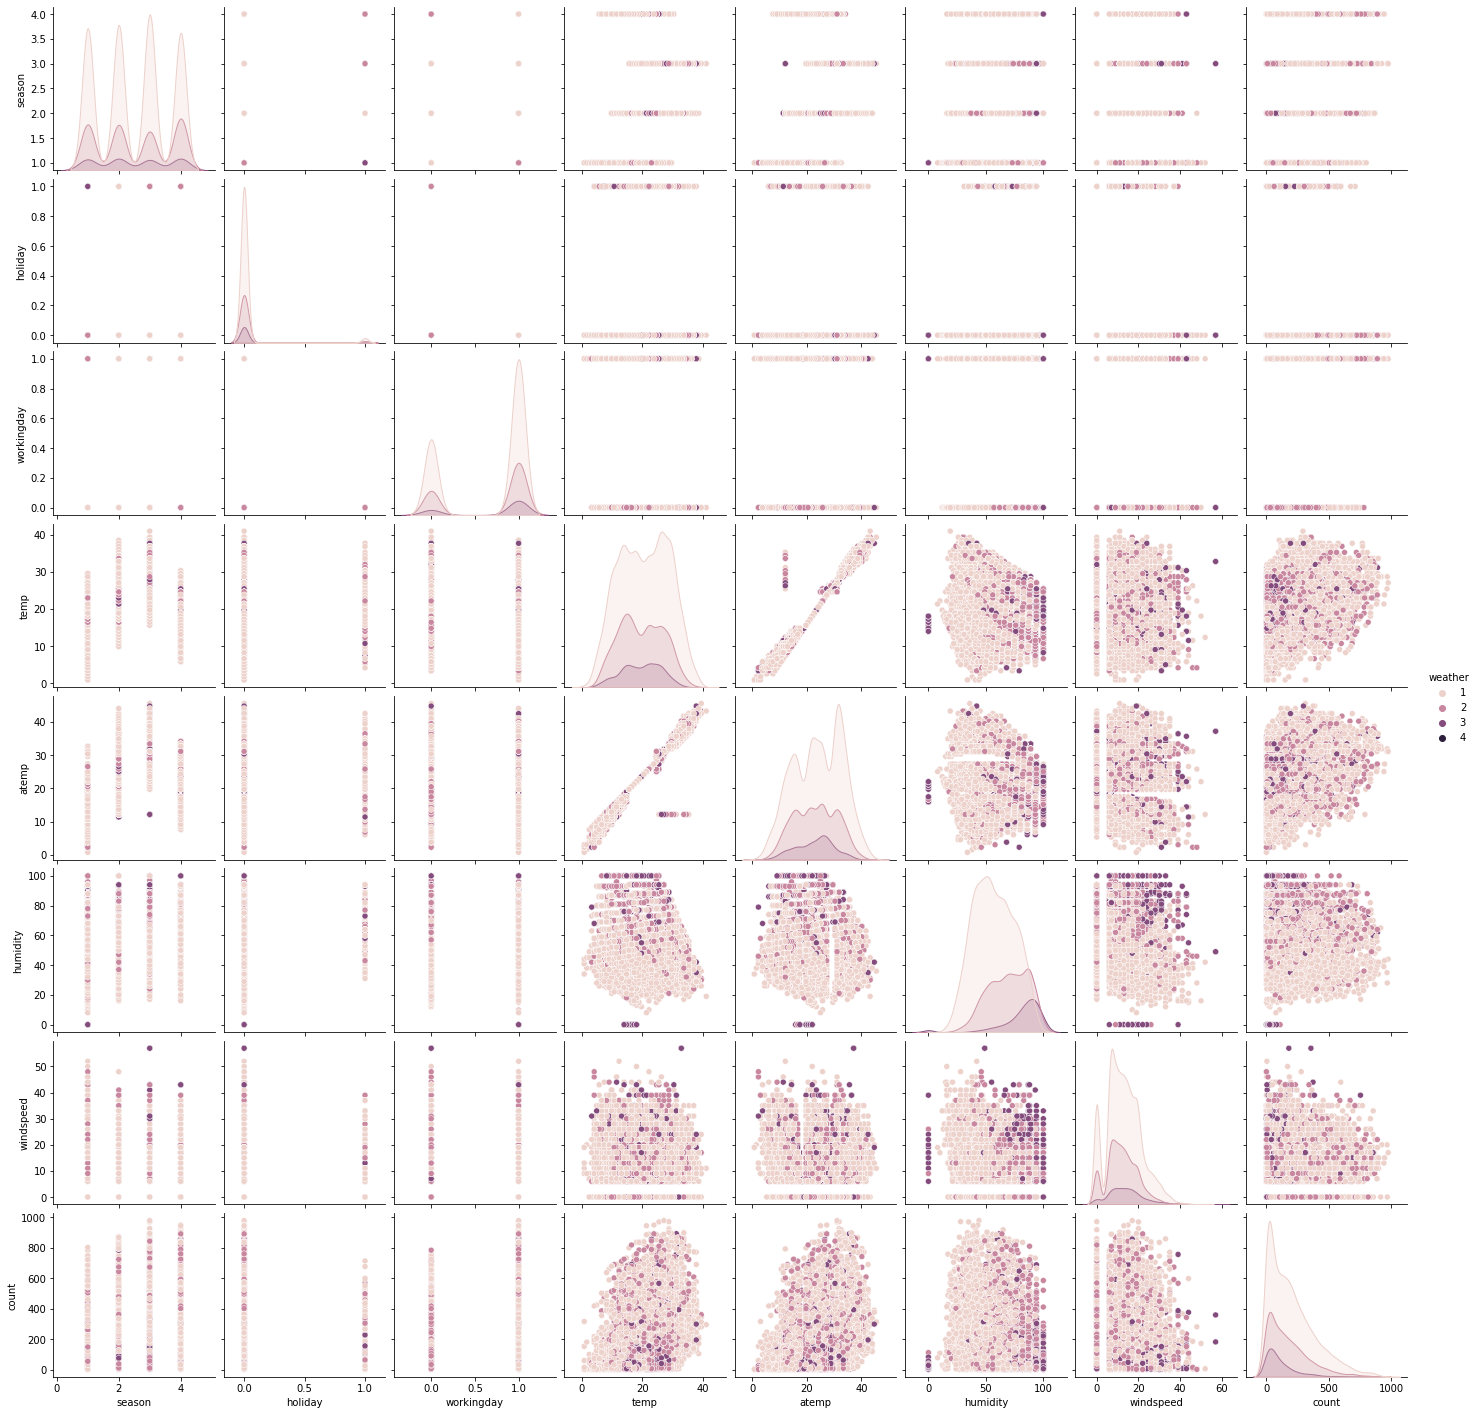

In [19]:
## Let's view pairwise scatterplots with weather facet 
sns.pairplot(train, hue="weather")

### Timeseries analysis

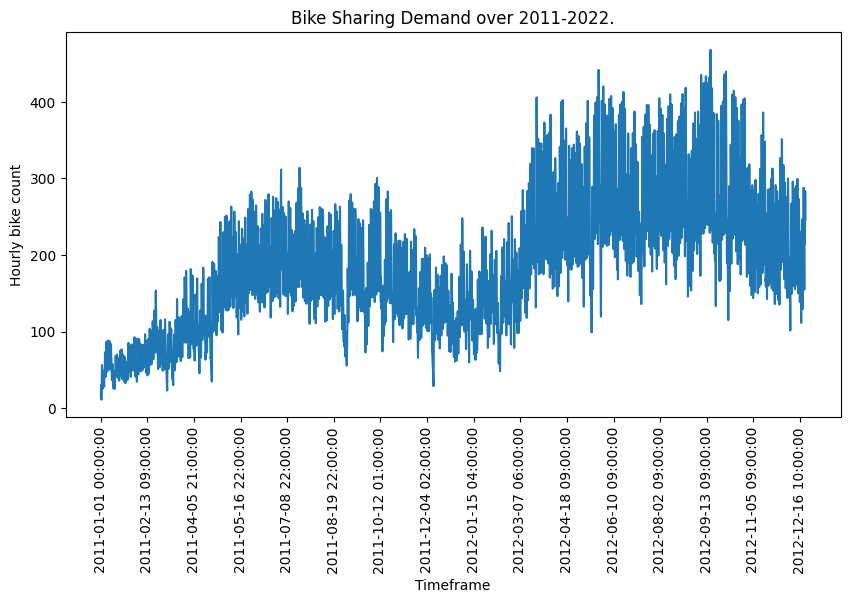

In [23]:
plt.figure(figsize=(10,5))

plt.plot(train['datetime'],train['count'].ewm(span = 24).mean())
plt.title('Bike Sharing Demand over 2011-2022.')
plt.xlabel('Timeframe')
plt.ylabel('Hourly bike count')

start_number=0
end_number = len(train['datetime'])
step_number = 24*30

plt.xticks(range(start_number,end_number,step_number),rotation=90)
plt.show()

In [21]:
## Observation: there is a general growth trend (2011 vs 2012)
## Let's look at week timeframe

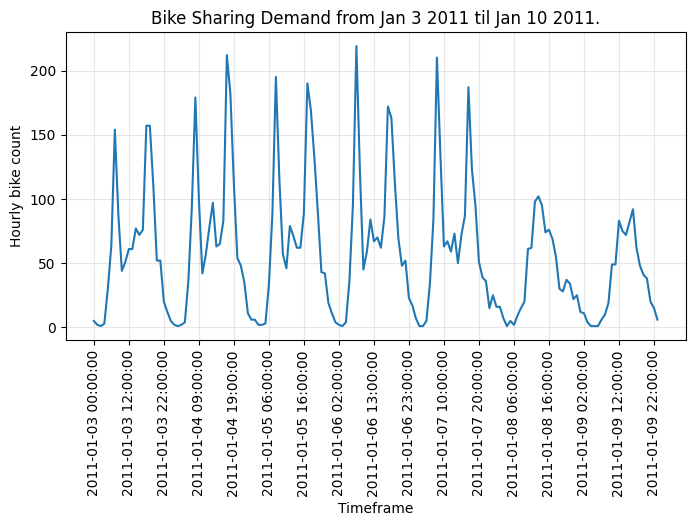

In [26]:
filt = (train['datetime']>='2011-01-03') & (train['datetime']<='2011-01-10')

plt.figure(figsize=(8,4))

plt.plot(train[filt]['datetime'],train[filt]['count'])

plt.title('Bike Sharing Demand from Jan 3 2011 til Jan 10 2011.')
plt.xlabel('Timeframe')
plt.ylabel('Hourly bike count')

start_number=0
end_number = len(train[filt]['datetime'])
step_number = 10

plt.grid(alpha=0.3)
plt.xticks(range(start_number,end_number,step_number),rotation=90)
plt.show()

In [23]:
## observations: high hourly seasonality, low demand at weekends

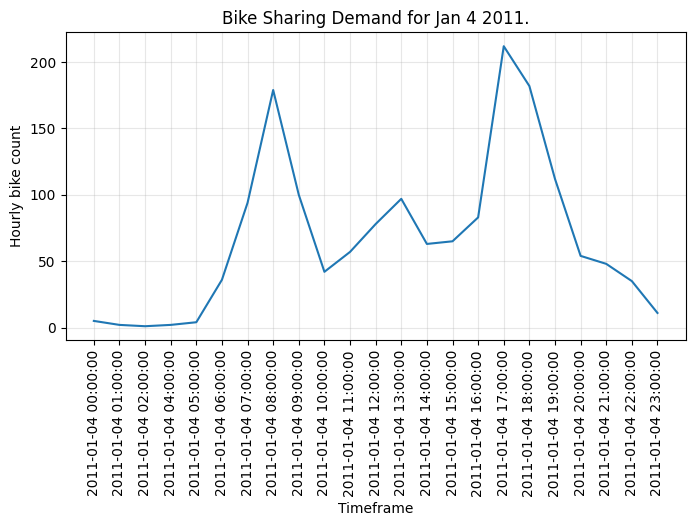

In [28]:
## Let's look at day timeframe

plt.figure(figsize=(8,4))

filt = (train['datetime']>='2011-01-04') & (train['datetime']<'2011-01-05')

plt.plot(train[filt]['datetime'],train[filt]['count'])

plt.title('Bike Sharing Demand for Jan 4 2011.')
plt.xlabel('Timeframe')
plt.ylabel('Hourly bike count')
plt.grid(alpha=0.3)

plt.xticks(rotation=90)
plt.show()

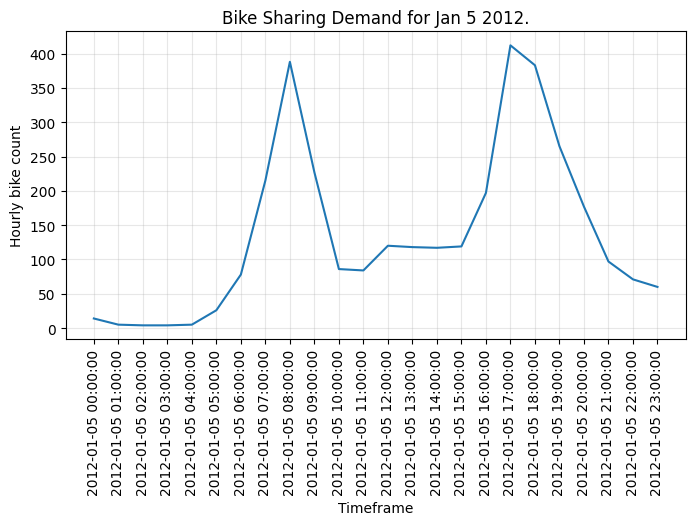

In [29]:
## Let's look at day timeframe

plt.figure(figsize=(8,4))

filt = (train['datetime']>='2012-01-05') & (train['datetime']<'2012-01-06')

plt.plot(train[filt]['datetime'],train[filt]['count'])
plt.title('Bike Sharing Demand for Jan 5 2012.')
plt.xlabel('Timeframe')
plt.ylabel('Hourly bike count')
plt.grid(alpha=0.3)

plt.xticks(rotation=90)
plt.show()

In [26]:
## Observation: there ara 3 spikes in demand observed across morning (7am - 9am), lunch (11am - 1pm), and evening (4 - 7pm). On the other hand, demand tends to fall to its lowest levels starting from 11PM till 6AM. 

### Feature Engineering

In [23]:
# create a new feature

train['datetime'] = pd.to_datetime(train['datetime'])
train['datetime_hour'] = train['datetime'].dt.hour
train['datetime_day'] = train['datetime'].dt.day
# train['datetime_week'] = train['datetime'].dt.week
train['datetime_month'] = train['datetime'].dt.month
train['datetime_year'] = train['datetime'].dt.year
train['datetime_dayofweek'] = train['datetime'].dt.dayofweek

test['datetime'] = pd.to_datetime(test['datetime'])
test['datetime_hour'] = test['datetime'].dt.hour
test['datetime_day'] = test['datetime'].dt.day
# test['datetime_week'] = test['datetime'].dt.week
test['datetime_month'] = test['datetime'].dt.month
test['datetime_year'] = test['datetime'].dt.year
test['datetime_dayofweek'] = test['datetime'].dt.dayofweek

In [24]:
## adding extra hour categories: morning, lunch, evening, none

def extract_hour_category(h):
    if h in [7,8,9]:
        return 1
    elif h in [11,12,13]:
        return 2
    elif h in [17,18,19]:
        return 3
    elif h in [23,0,1,2,3,4,5]:
        return 4
    else:
        return 0

    
train['hour_category'] = train['datetime_hour'].apply(lambda x: extract_hour_category(x))
test['hour_category'] = test['datetime_hour'].apply(lambda x: extract_hour_category(x))

## Make category types for these so models know they are not just numbers
* AutoGluon originally sees these as ints, but in reality they are int representations of a category.
* Setting the dtype to category will classify these as categories in AutoGluon.

In [25]:
train["season"] = train["season"].astype("category")
train["weather"] = train["weather"].astype("category")
test["season"] = test["season"].astype("category")
test["weather"] = test["weather"].astype("category")
train['hour_category'] = train["hour_category"].astype("category")
test['hour_category'] = test["hour_category"].astype("category")

In [26]:
# View are new feature
train.head()

datetime season  holiday  workingday weather  temp   atemp  \
0 2011-01-01 00:00:00      1        0           0       1  9.84  14.395   
1 2011-01-01 01:00:00      1        0           0       1  9.02  13.635   
2 2011-01-01 02:00:00      1        0           0       1  9.02  13.635   
3 2011-01-01 03:00:00      1        0           0       1  9.84  14.395   
4 2011-01-01 04:00:00      1        0           0       1  9.84  14.395   

   humidity  windspeed  count  datetime_hour  datetime_day  datetime_month  \
0        81        0.0     16              0             1               1   
1        80        0.0     40              1             1               1   
2        80        0.0     32              2             1               1   
3        75        0.0     13              3             1               1   
4        75        0.0      1              4             1               1   

   datetime_year  datetime_dayofweek hour_category  
0           2011                   5             4  
1           2011                   5             4  
2           2011                   5             4  
3           2011                   5             4  
4           2011                   5             4

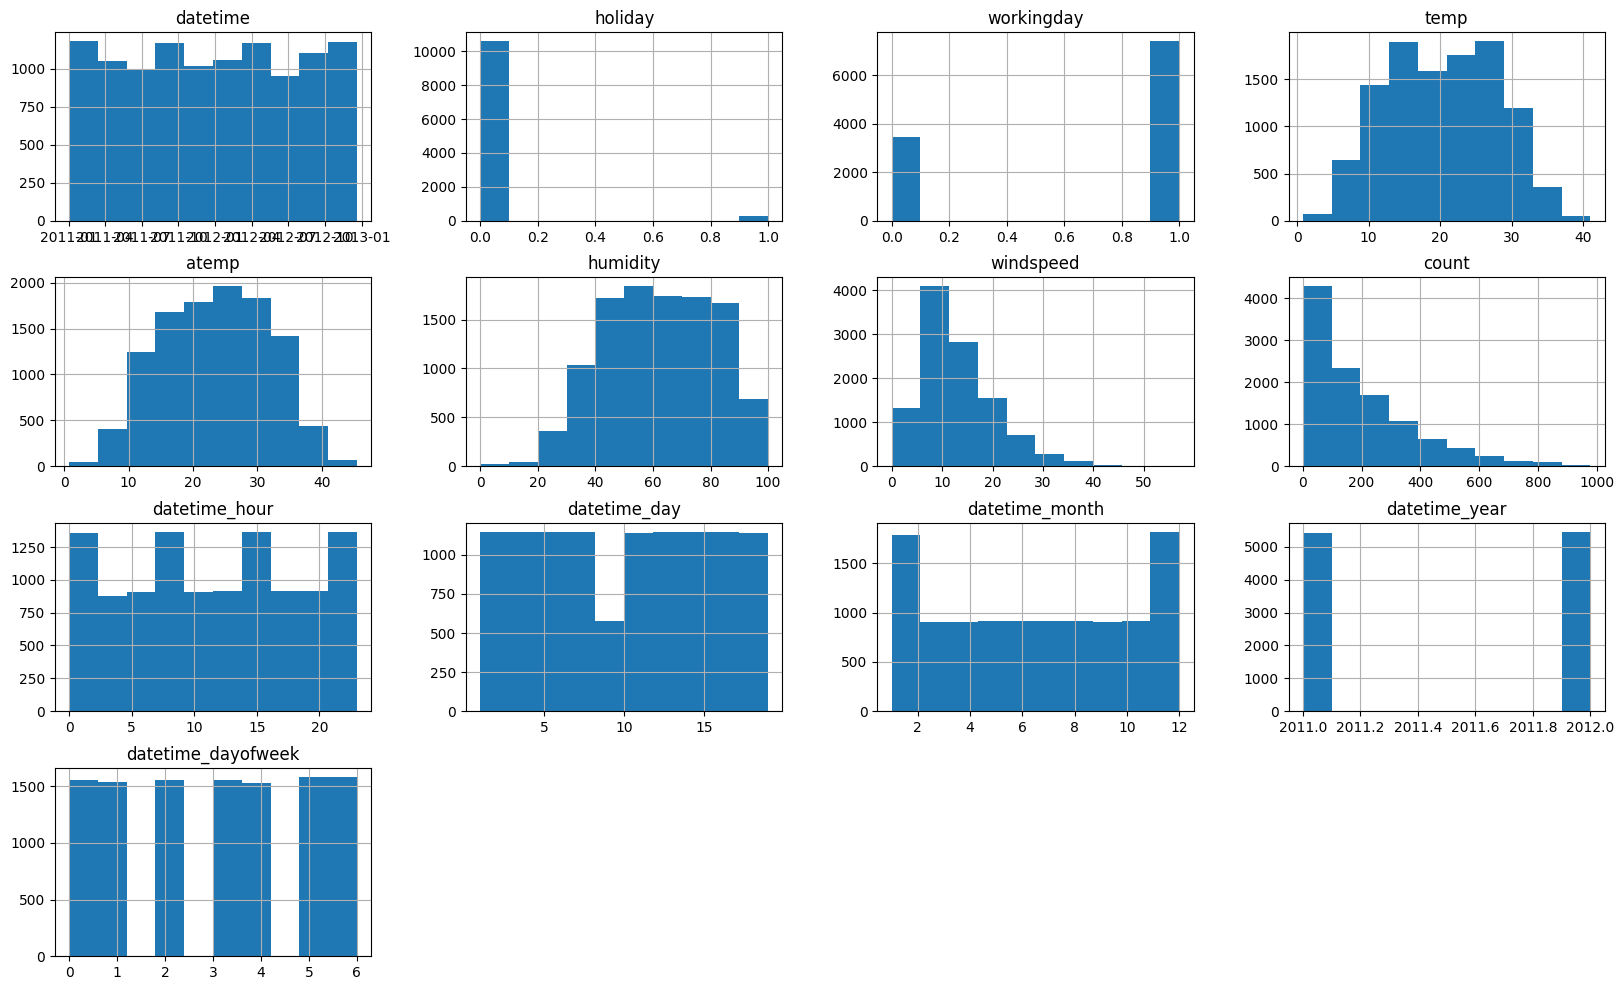

In [27]:
# View histogram of all features again now with the hour feature
import matplotlib.pyplot as plt
train.hist(figsize = (20,12))
plt.show()

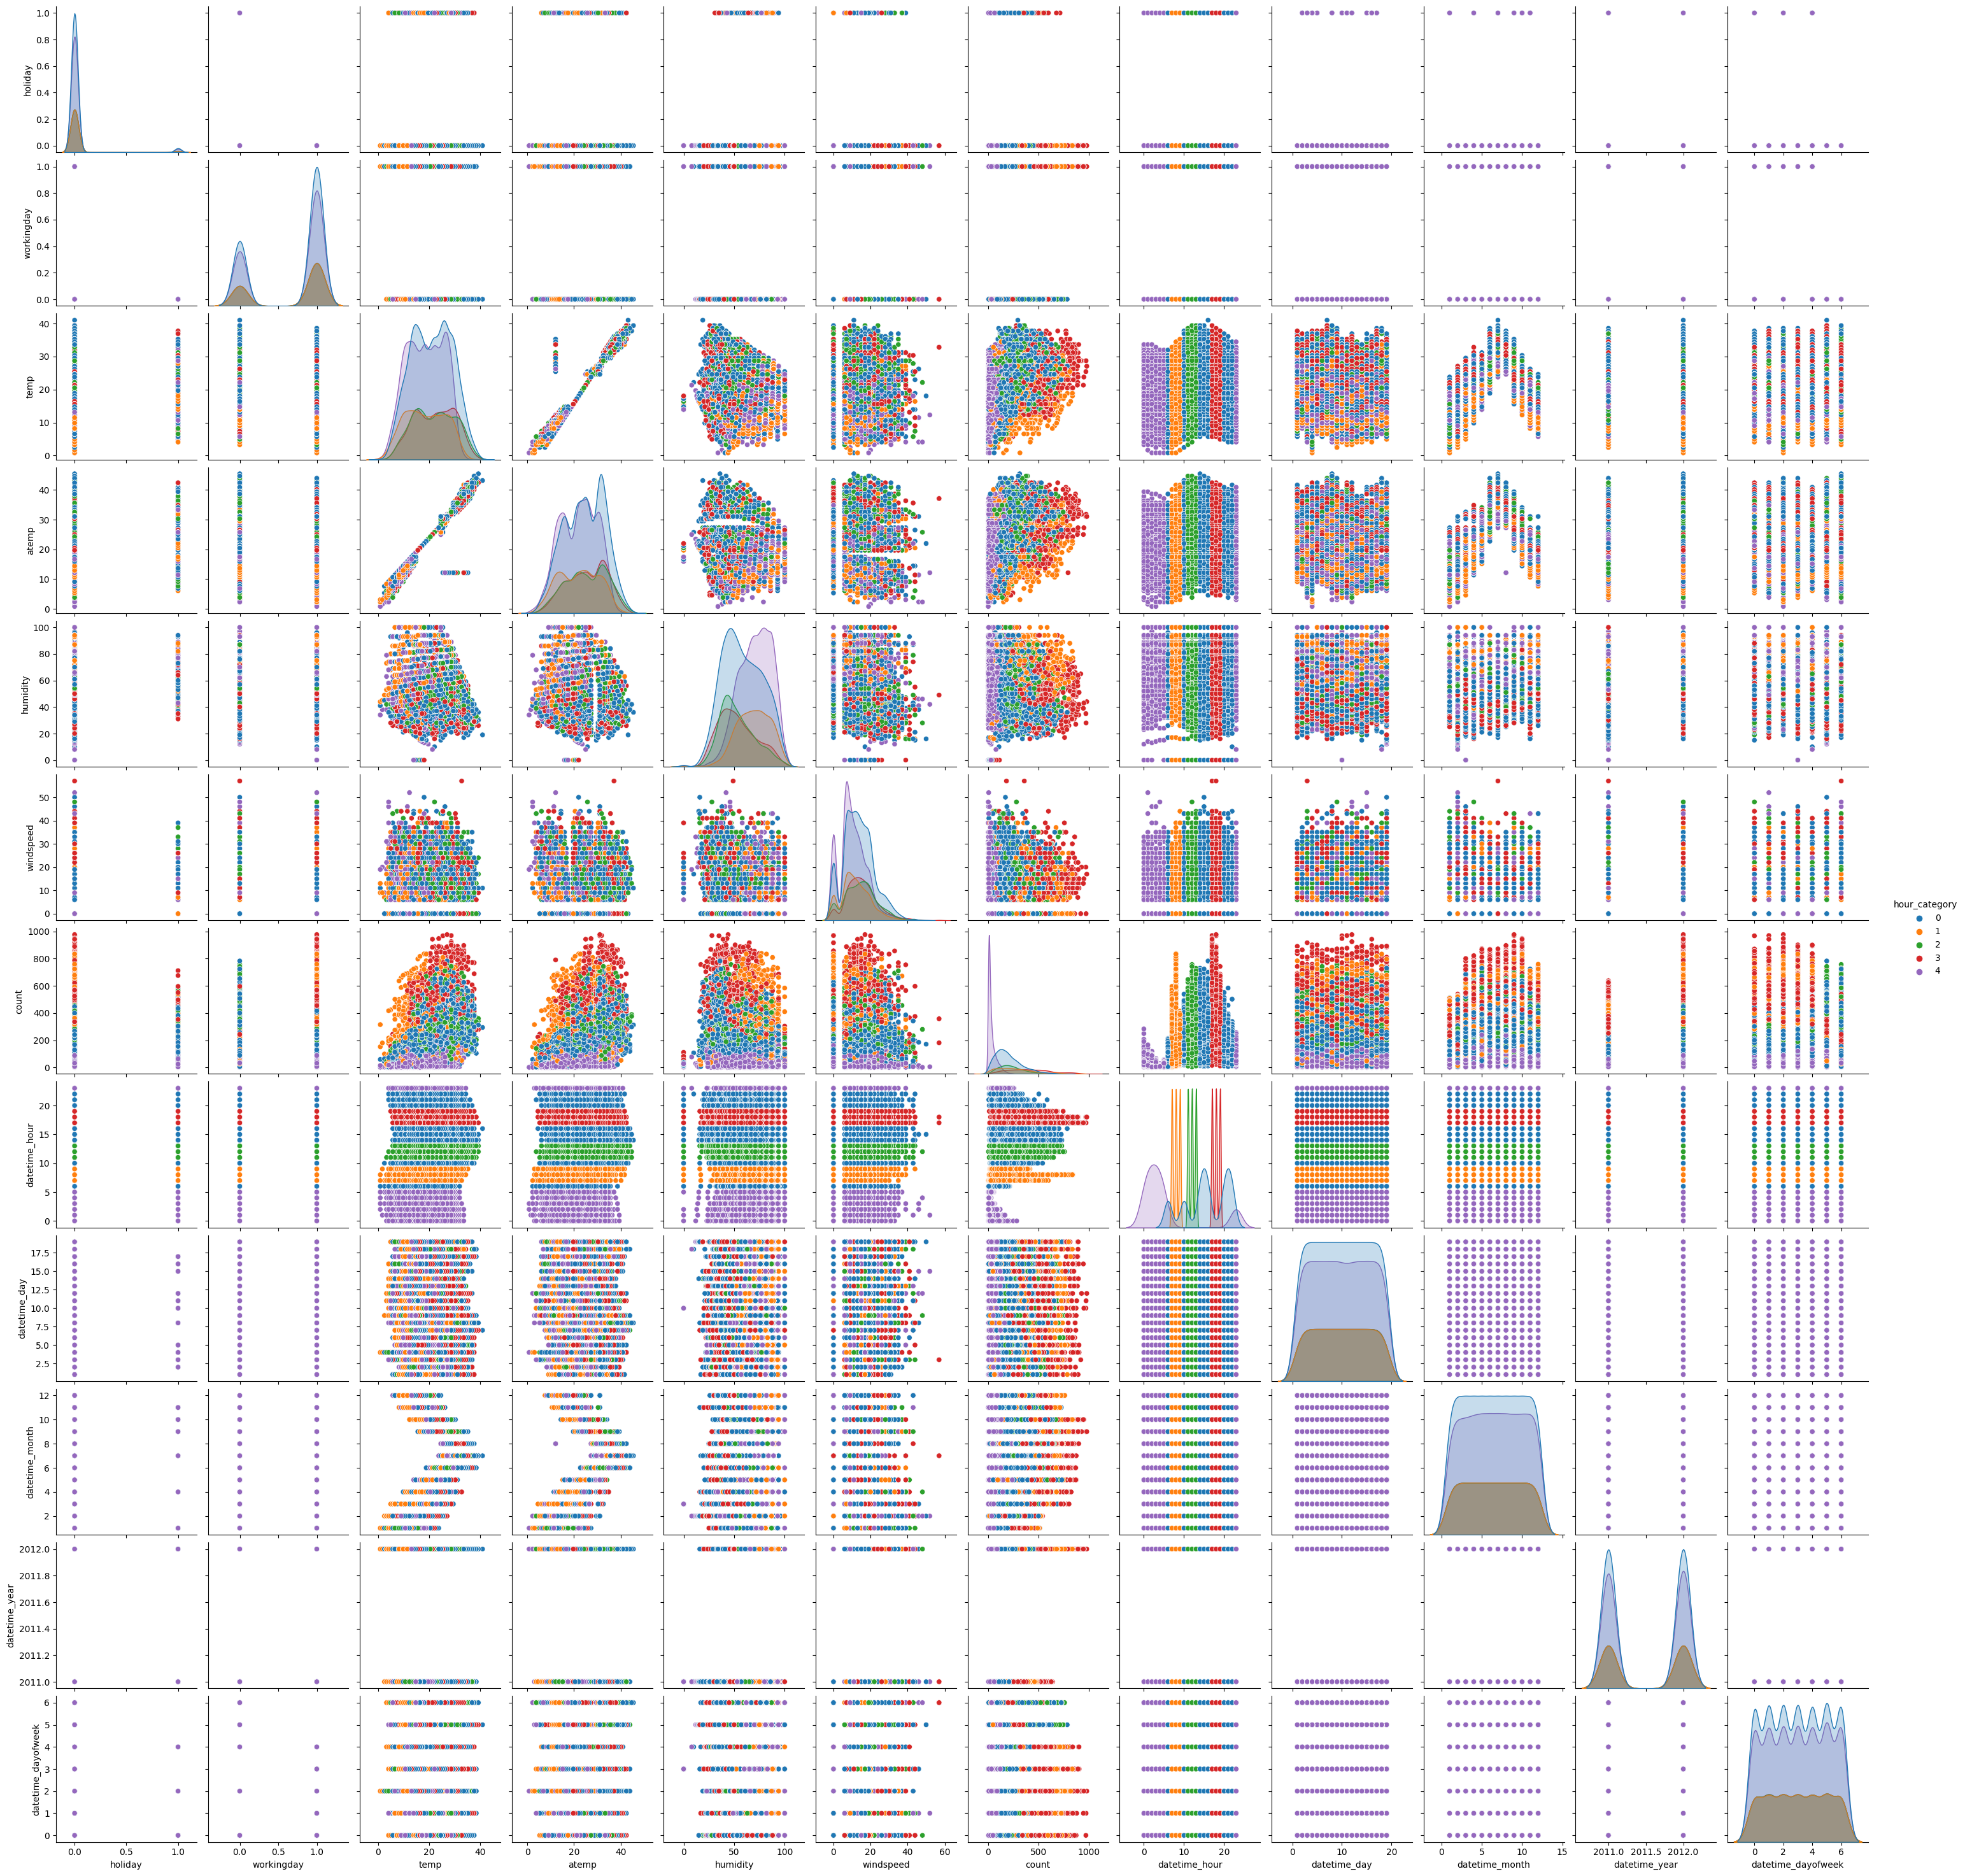

In [78]:
sns.pairplot(train, hue="hour_category")

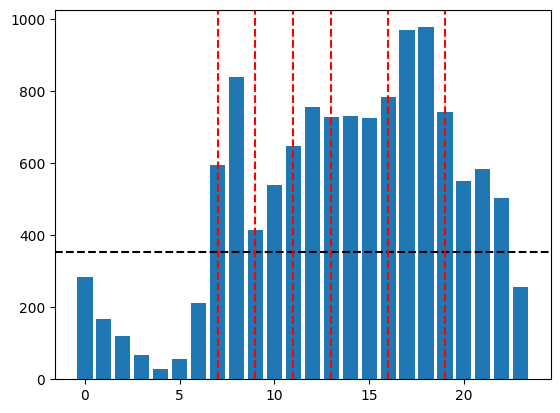

In [23]:
filt = (train['datetime_year']==2012) #& (train['datetime_month']==4)

plt.bar(train[filt]['datetime_hour'],train[filt]['count'])
plt.axhline(train[filt]['count'].quantile(0.75),c='black',linestyle='--')

plt.axvline(7, c='r', linestyle='--')
plt.axvline(9, c='r', linestyle='--')

plt.axvline(11, c='r', linestyle='--')
plt.axvline(13, c='r', linestyle='--')

plt.axvline(16, c='r', linestyle='--')
plt.axvline(19, c='r', linestyle='--')

In [24]:
train['count'].describe()

count    10886.000000
mean       191.574132
std        181.144454
min          1.000000
25%         42.000000
50%        145.000000
75%        284.000000
max        977.000000
Name: count, dtype: float64

## Step 5: Rerun the model with the same settings as before, just with more features

In [2]:
!brew uninstall libomp 

Uninstalling /usr/local/Cellar/libomp/15.0.6... (7 files, 1.6MB)


In [ ]:
predictor_new_features = TabularPredictor(
    label = 'count',
    eval_metric = 'root_mean_squared_error',
).fit(
    train_data = train,
    time_limit = 600, 
    presets='best_quality'
)

No path specified. Models will be saved in: "AutogluonModels/ag-20221225_140512/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20221225_140512/"
AutoGluon Version:  0.6.1
Python Version:     3.8.10
Operating System:   Darwin
Platform Machine:   x86_64
Platform Version:   Darwin Kernel Version 22.1.0: Sun Oct  9 20:14:54 PDT 2022; root:xnu-8792.41.9~2/RELEASE_X86_64
Train Data Rows:    10886
Train Data Columns: 15
Label Column: count
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (977, 1, 191.57413, 181.14445)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_typ

In [ ]:
predictor_new_features.fit_summary()

In [ ]:
predictor_new_features.leaderboard(silent=True).plot(kind="bar", x="model", y="score_val")

In [ ]:
# Remember to set all negative values to zero
predictions_new_features = predictor_new_features.predict(test)
predictions_new_features.describe()

In [ ]:
(predictions_new_features<0).sum()

In [ ]:
predictions_new_features = predictions_new_features.apply(lambda x: 0 if x<0 else x)

In [ ]:
submission_new_features = pd.read_csv("sampleSubmission.csv")

In [ ]:
# Same submitting predictions
submission_new_features["count"] = predictions_new_features
submission_new_features.to_csv("submission_new_features.csv", index=False)

In [ ]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_features.csv -m "final round of new features experiment + removing week"

In [ ]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 10

#### New Score of 0.53993

## Step 6: Hyper parameter optimization
* There are many options for hyper parameter optimization.
* Options are to change the AutoGluon higher level parameters or the individual model hyperparameters.
* The hyperparameters of the models themselves that are in AutoGluon. Those need the `hyperparameter` and `hyperparameter_tune_kwargs` arguments.

In [54]:
## trying some of the autogluon hyperparameters:
## auto_stack = True (default = False)
## num_bag_folds = 5 (default = 0)
## num_bag_sets = 2 (default = 1)
## num_stack_levels = 1 (default = 0)
## time_limit = 1200 (increased from 10 min to 20min)


In [72]:
predictor_new_hpo = TabularPredictor(
    label = 'count',
    eval_metric = 'root_mean_squared_error',
).fit(
    train_data = train,
    time_limit = 1200, 
    presets='best_quality',
    auto_stack = True,
    num_bag_folds = 5,
    num_bag_sets = 2,
    num_stack_levels = 1, 
)

No path specified. Models will be saved in: "AutogluonModels/ag-20221224_072448/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=5, num_bag_sets=2
Beginning AutoGluon training ... Time limit = 1200s
AutoGluon will save models to "AutogluonModels/ag-20221224_072448/"
AutoGluon Version:  0.6.1
Python Version:     3.7.10
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Wed Oct 26 20:36:53 UTC 2022
Train Data Rows:    10886
Train Data Columns: 15
Label Column: count
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (977, 1, 191.57413, 181.14445)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Fe

In [73]:
predictor_new_hpo.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -29.256551      14.213488  979.219029                0.001051           0.648015            3       True         20
1   NeuralNetFastAI_BAG_L2  -29.458970      13.688371  848.086095                0.434289          75.507069            2       True         17
2          CatBoost_BAG_L2  -30.480220      13.337215  863.181264                0.083133          90.602238            2       True         15
3          LightGBM_BAG_L2  -30.690249      13.461145  788.204476                0.207063          15.625450            2       True         13
4           XGBoost_BAG_L2  -30.797255      13.487952  796.836255                0.233870          24.257229            2       True         18
5     LightGBMLarge_BAG_L2  -31.309365      13.585539  798.943296         

{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'XGBoost_BAG_L1': 'StackerEnsembleModel_XGBoost',
  'LightGBMLarge_BAG_L1': 'StackerEnsembleModel_LGB',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L2': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L2': 'StackerEnsembleModel_NNFastAiTabular',
  'XGBoost_BAG_L2': 'StackerEnsembleModel_XGBoost',
  'Ligh

In [74]:
# Remember to set all negative values to zero
predictions_new_hpo = predictor_new_hpo.predict(test)
predictions_new_hpo.describe()

count    6493.000000
mean      145.527893
std       119.187439
min        -1.280133
25%        55.856758
50%       121.259941
75%       197.384064
max       783.133545
Name: count, dtype: float64

In [75]:
(predictions_new_hpo<0).sum()

2

In [76]:
predictions_new_hpo = predictions_new_hpo.apply(lambda x: 0 if x<0 else x)
predictions_new_hpo.describe()

count    6493.000000
mean      145.528241
std       119.187023
min         0.000000
25%        55.856758
50%       121.259941
75%       197.384064
max       783.133545
Name: count, dtype: float64

In [77]:
submission_new_hpo = pd.read_csv("sampleSubmission.csv")

In [78]:
# Same submitting predictions
submission_new_hpo["count"] = predictions_new_hpo
submission_new_hpo.to_csv("submission_new_hpo.csv", index=False)

In [79]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo.csv -m "new features with hyperparameters 20min"

100%|█████████████████████████████████████████| 243k/243k [00:00<00:00, 460kB/s]
Successfully submitted to Bike Sharing Demand

In [80]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                              status    publicScore  privateScore  
---------------------------  -------------------  ---------------------------------------  --------  -----------  ------------  
submission_new_hpo.csv       2022-12-24 07:46:53  new features with hyperparameters 20min  complete  0.75807      0.75807       
submission_new_hpo.csv       2022-12-24 07:24:12  new features with hyperparameters        complete  0.70259      0.70259       
submission_new_features.csv  2022-12-23 19:04:24  new features                             complete  0.53993      0.53993       
submission.csv               2022-12-23 16:41:50  first raw submission                     complete  1.79033      1.79033       


#### New Score of 0.75807

## HPO_3

In [82]:
predictor_new_hpo_3 = TabularPredictor(
    label = 'count',
    eval_metric = 'root_mean_squared_error',
).fit(
    train_data = train,
    time_limit = 1200, 
    presets='best_quality',
    auto_stack = False
)

No path specified. Models will be saved in: "AutogluonModels/ag-20221224_075115/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 1200s
AutoGluon will save models to "AutogluonModels/ag-20221224_075115/"
AutoGluon Version:  0.6.1
Python Version:     3.7.10
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Wed Oct 26 20:36:53 UTC 2022
Train Data Rows:    10886
Train Data Columns: 15
Label Column: count
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (977, 1, 191.57413, 181.14445)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using F

In [83]:
predictor_new_hpo_3.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val  pred_time_val     fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -29.439441      13.850126  1105.069980                0.001104           0.414956            3       True         16
1   NeuralNetFastAI_BAG_L2  -29.918216      13.392143   898.311662                0.529855         112.754158            2       True         15
2          CatBoost_BAG_L2  -30.043253      12.992468   966.004151                0.130179         180.446647            2       True         13
3          LightGBM_BAG_L2  -30.231362      13.188988   811.454219                0.326699          25.896715            2       True         11
4        LightGBMXT_BAG_L2  -31.326369      13.516185   814.564644                0.653896          29.007140            2       True         10
5     ExtraTreesMSE_BAG_L2  -31.499720      13.248909   792.177646  

{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L2': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L2': 'StackerEnsembleModel_NNFastAiTabular',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -101.54619908446061,
  'KNeighborsDist_BAG_L1': -84.12506123181602

In [84]:
# Remember to set all negative values to zero
predictions_new_hpo_3 = predictor_new_hpo_3.predict(test)
predictions_new_hpo_3.describe()

count    6493.000000
mean      150.272659
std       124.839096
min        -0.809773
25%        56.018387
50%       120.447777
75%       209.722046
max       778.677795
Name: count, dtype: float64

In [85]:
(predictions_new_hpo_3<0).sum()

2

In [86]:
predictions_new_hpo_3 = predictions_new_hpo_3.apply(lambda x: 0 if x<0 else x)
predictions_new_hpo_3.describe()

count    6493.000000
mean      150.272888
std       124.838814
min         0.000000
25%        56.018387
50%       120.447777
75%       209.722046
max       778.677795
Name: count, dtype: float64

In [87]:
submission_new_hpo_3 = pd.read_csv("sampleSubmission.csv")
# Same submitting predictions
submission_new_hpo_3["count"] = predictions_new_hpo_3
submission_new_hpo_3.to_csv("submission_new_hpo_3.csv", index=False)

In [88]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo_3.csv -m "new features with hyperparameters 20min with autostack on"

100%|█████████████████████████████████████████| 243k/243k [00:00<00:00, 510kB/s]
Successfully submitted to Bike Sharing Demand

In [89]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                                                status    publicScore  privateScore  
---------------------------  -------------------  ---------------------------------------------------------  --------  -----------  ------------  
submission_new_hpo_3.csv     2022-12-24 08:30:07  new features with hyperparameters 20min with autostack on  complete  0.73826      0.73826       
submission_new_hpo.csv       2022-12-24 07:46:53  new features with hyperparameters 20min                    complete  0.75807      0.75807       
submission_new_hpo.csv       2022-12-24 07:24:12  new features with hyperparameters                          complete  0.70259      0.70259       
submission_new_features.csv  2022-12-23 19:04:24  new features                                               complete  0.53993      0.53993       


#### New Score of 0.75807

### HPO V4. Using Train/Val split

In [75]:
predictor_val_split = TabularPredictor(
    label = 'count',
    eval_metric = 'root_mean_squared_error',
).fit(
    train_data = train_split,
    tuning_data = val_split,
    time_limit = 600, 
    presets='best_quality'
)

No path specified. Models will be saved in: "AutogluonModels/ag-20221224_122028/"


ValueError: Unknown `.fit` keyword argument specified: 'tune_data'
Valid kwargs: ['ag_args', 'ag_args_ensemble', 'ag_args_fit', 'auto_stack', 'calibrate', 'excluded_model_types', 'feature_generator', 'feature_prune_kwargs', 'holdout_frac', 'hyperparameter_tune_kwargs', 'keep_only_best', 'name_suffix', 'num_bag_folds', 'num_bag_sets', 'num_stack_levels', 'pseudo_data', 'refit_full', 'save_space', 'set_best_to_refit_full', 'unlabeled_data', 'use_bag_holdout', 'verbosity']

In [ ]:
predictor.feature_importance(val_split)


### HPO V5. Tuning models 

In [74]:
from sklearn.model_selection import train_test_split
train_split, val_split = train_test_split(train, test_size = 0.1, random_state = 0)

In [ ]:
nn_options = {  
    'num_epochs': 10,  
    'learning_rate': ag.space.Real(1e-4, 1e-2, default=5e-4, log=True), 
    'activation': ag.space.Categorical('relu', 'softrelu', 'tanh'),  
    'dropout_prob': ag.space.Real(0.0, 0.5, default=0.1),  

gbm_options = {  
    'num_boost_round': [100,  1000, 10000]
    'num_leaves': ag.space.Int(lower=26, upper=66, default=36), 

rt_options = {
      'n_estimators': [150,200,250,300]
}

xt_options = {
    'n_estimators': [150,200,250,300]
}



hyperparameters = {  # hyperparameters of each model type
                   'GBM': gbm_options,
                   'NN_TORCH': nn_options,  # NOTE: comment this line out if you get errors on Mac OSX
                   'RF': rt_options,
                   'XT': xt_options,
                  }  # When these keys are missing from hyperparameters dict, no models of that type are trained


# hyperparameters = {
#                # 'NN': {'num_epochs': 500},
#                'GBM': {'num_boost_round': 10000},
#                'CAT': {'iterations': 10000},
#                'RF': {'n_estimators': 300},
#                'XT': {'n_estimators': 300},
# }


time_limit = 2*60  # train various models for ~2 min
num_trials = 5  # try at most 5 different hyperparameter configurations for each type of model
search_strategy = 'skopt'  # to tune hyperparameters using SKopt Bayesian optimization routine
    
label = 'count'
eval_metric = 'root_mean_squared_error'
    
hyperparameter_tune_kwargs = {  # HPO is not performed unless hyperparameter_tune_kwargs is specified
    'num_trials': num_trials,
    'scheduler' : 'local',
    'searcher': search_strategy,
}

In [ ]:
predictor_hpo_final = TabularPredictor(
    label=label, 
    eval_metric=metric

).fit(
    train_data = train_split,
    tuning_data = val_split,
    time_limit=time_limit,
    hyperparameters=hyperparameters, 
    hyperparameter_tune_kwargs=hyperparameter_tune_kwargs,
)

## Step 7: Write a Report
### Refer to the markdown file for the full report
### Creating plots and table for report

In [ ]:
# Taking the top model score from each training run and creating a line plot to show improvement
# You can create these in the notebook and save them to PNG or use some other tool (e.g. google sheets, excel)
fig = pd.DataFrame(
    {
        "model": ["initial", "add_features", "hpo"],
        "score": [?, ?, ?]
    }
).plot(x="model", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_train_score.png')

In [ ]:
# Take the 3 kaggle scores and creating a line plot to show improvement
fig = pd.DataFrame(
    {
        "test_eval": ["initial", "add_features", "hpo_1",  "hpo_2", "hpo_3"],
        "score": [1.79033, 0.53993, 0.70259, 0.75807, ]
    }
).plot(x="test_eval", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_test_score.png')

### Hyperparameter table

In [ ]:
# The 3 hyperparameters we tuned with the kaggle score as the result
pd.DataFrame({
    "model": ["initial", "add_features", "hpo"],
    "hpo1": [?, ?, ?],
    "hpo2": [?, ?, ?],
    "hpo3": [?, ?, ?],
    "score": [?, ?, ?]
})